In [1]:
import torch
import torch.nn as nn

In [2]:
from transformers import AutoTokenizer

### Choosing the Model

In [3]:
model_name = "google/bert_uncased_L-2_H-128_A-2"

### Exploring the Model's Tokenizer

In [4]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [5]:
tokenizer("I")

{'input_ids': [101, 1045, 102], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [6]:
tokenizer("I am a boy")

{'input_ids': [101, 1045, 2572, 1037, 2879, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [7]:
tokenizer("I am a criminal")

{'input_ids': [101, 1045, 2572, 1037, 4735, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [8]:
tokenizer("These are raw vectors, no contextual meaning")

{'input_ids': [101, 2122, 2024, 6315, 19019, 1010, 2053, 6123, 8787, 3574, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [9]:
tokenizer("These are raw vectors, with contextual meaning")

{'input_ids': [101, 2122, 2024, 6315, 19019, 1010, 2007, 6123, 8787, 3574, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
tokenizer("with")

{'input_ids': [101, 2007, 102], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [11]:
batch = tokenizer("These are raw vectors, without contextual meaning", padding = "max_length", truncation = True, max_length = 32, return_tensors = 'pt')

In [12]:
batch

{'input_ids': tensor([[  101,  2122,  2024,  6315, 19019,  1010,  2302,  6123,  8787,  3574,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])}

### Checking GPU Availability

In [13]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Importing AutoModel and initialising the Transformer Model

In [14]:
from transformers import AutoModel

In [15]:
mod = AutoModel.from_pretrained(model_name) ## the transformer model

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

In [16]:
mod = mod.to(device)

In [17]:
t = mod(**batch.to(device))

In [18]:
batch.input_ids.shape

torch.Size([1, 32])

### Storing the Embedding Dimension in a variable

In [19]:
## The pretrained model's embedding dimension
EMB_DIM = t.last_hidden_state.shape[2]

In [20]:
sentences = ["These are raw vectors, without contextual meaning", "God is real"]

In [21]:
batch = tokenizer(sentences, padding = "max_length", truncation = True, max_length = 200, return_tensors = 'pt')

In [22]:
t.last_hidden_state.shape

torch.Size([1, 32, 128])

### Downloading the Dataset

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn

In [24]:
import kagglehub
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

In [25]:
file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [26]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Encoding Sentiment: Positive = 1, Negative = 0

In [27]:
df['encoded_senti'] = 0

In [28]:
df.loc[df['sentiment'] == 'positive', 'encoded_senti'] = 1

In [29]:
df

,review,sentiment,encoded_senti
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [30]:
df['encoded_senti'].value_counts()

,count
encoded_senti,
1,25000
0,25000


### Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['encoded_senti'], shuffle = True, random_state = 100, test_size = 0.2)

### Definition for the Model Class

In [32]:
class lstm(nn.Module):
  ## The Model
  def __init__(self, inp_emb_dim):
    super().__init__()
    self.lstm_layer = nn.LSTM(inp_emb_dim, 32, dropout = 0.3, batch_first = True)
    self.lin1 = nn.Linear(32, 1)
    # self.lin2 = nn.Linear(8, 1)
    self.sig = nn.Sigmoid()
    # self.

  def forward(self, X):
    out = self.lstm_layer(X)
    # print(out[1].shape)
    # out = self.lin1(out[1][1])
    out = self.lin1(out[1][1])
    # out = self.lin2(out)
    out = self.sig(out)
    return out

In [33]:
torch.cuda.empty_cache()

In [96]:
MAX_LENGTH = 200 ## Max Number of Tokens

In [35]:
import tqdm

### Training

In [36]:
X_train_list = list(X_train)

#### Preparing the Train Tensor

In [97]:
# mod = torch.compile(mod)

list_embed = torch.empty((len(X_train_list), MAX_LENGTH, EMB_DIM), dtype=torch.float16)  # Pre-allocate tensor

batch_size = 64
for i in tqdm.tqdm(range(0, len(X_train_list), batch_size)):
    batch = X_train_list[i:i+batch_size]
    with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
        ## tokenize
        inputs = tokenizer(batch, padding="max_length", truncation=True,
                           max_length=MAX_LENGTH, return_tensors="pt").to(device, non_blocking=True)

        ## pass through transformer model
        out = mod(**inputs)

        ## Transfer to CPU and store in tensor
        emb = out.last_hidden_state.cpu()  # Shape: (batch_size, MAX_LENGTH, EMB_DIM)
        list_embed[i:i+batch_size] = emb

torch.cuda.empty_cache()


  0%|          | 0/625 [00:00<?, ?it/s]/tmp/ipython-input-97-3553519115.py:8: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
100%|██████████| 625/625 [00:43<00:00, 14.36it/s]


#### X_train and y_train tensors

In [98]:
X_train_tensor = list_embed

In [99]:
y_train_tensor = torch.from_numpy(y_train.values)

#### Model Instance

In [100]:
torch.manual_seed(10)
model = lstm(EMB_DIM).to(device)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


#### Optimizer, Num Epochs, Learning Rate

In [101]:
epochs = 20
learning_rate = 0.001

In [102]:
from torch.optim import Adam

In [103]:
optimizer = Adam(model.parameters(), lr = learning_rate)
loss_func = nn.BCELoss()

#### Dataset Object

In [104]:
from torch.utils.data import Dataset, DataLoader

In [105]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    ## Expects the input X to be transformer embedded already
    super().__init__()
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [106]:
dataset = CustomDataset(X_train_tensor, y_train_tensor)

#### Dataloader Object

In [107]:
batch_size = 32

In [108]:
dl = DataLoader(dataset, batch_size = batch_size, shuffle = True)

In [109]:
num_batches = 40000/batch_size

#### Testing forward pass for shape compatibility

In [110]:
x = model(dataset[:10][0].to(torch.float32).to(device)).reshape(-1).to('cpu')

In [111]:
loss_func(x, dataset[:10][1].to(torch.float32))

tensor(0.7659, grad_fn=<BinaryCrossEntropyBackward0>)

#### Training Loop

In [112]:
model.train()

lstm(
  (lstm_layer): LSTM(128, 32, batch_first=True, dropout=0.3)
  (lin1): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [113]:
for epoch in range(epochs):
  epoch_loss = 0
  for inp, outp in tqdm.tqdm(dl):

    ## Storing on cuda
    inp = inp.to(device)
    outp = outp.to(device)

    optimizer.zero_grad()

    ## Forward Passs
    pred = model(inp.to(torch.float32))

    ## Loss Calculation
    loss = loss_func(pred.reshape(-1).to(torch.float32), outp.to(torch.float32))
    epoch_loss += loss.item()

    ## Gradient Calculation and Parameter Updation
    loss.backward()
    optimizer.step()
  print(f'Epoch: {epoch + 1}, Loss = {epoch_loss/num_batches}')

100%|██████████| 1250/1250 [00:04<00:00, 276.74it/s]


Epoch: 1, Loss = 0.5599623131275177


100%|██████████| 1250/1250 [00:04<00:00, 311.40it/s]


Epoch: 2, Loss = 0.4979855735063553


100%|██████████| 1250/1250 [00:03<00:00, 315.65it/s]


Epoch: 3, Loss = 0.4496816274523735


100%|██████████| 1250/1250 [00:04<00:00, 284.39it/s]


Epoch: 4, Loss = 0.4178065687060356


100%|██████████| 1250/1250 [00:03<00:00, 316.57it/s]


Epoch: 5, Loss = 0.3933752700090408


100%|██████████| 1250/1250 [00:03<00:00, 318.54it/s]


Epoch: 6, Loss = 0.37744243351221085


100%|██████████| 1250/1250 [00:04<00:00, 282.11it/s]


Epoch: 7, Loss = 0.3574271569430828


100%|██████████| 1250/1250 [00:03<00:00, 317.28it/s]


Epoch: 8, Loss = 0.342741761469841


100%|██████████| 1250/1250 [00:03<00:00, 317.91it/s]


Epoch: 9, Loss = 0.32806029459834096


100%|██████████| 1250/1250 [00:04<00:00, 281.73it/s]


Epoch: 10, Loss = 0.3150398668050766


100%|██████████| 1250/1250 [00:03<00:00, 317.71it/s]


Epoch: 11, Loss = 0.30266847241520883


100%|██████████| 1250/1250 [00:03<00:00, 317.14it/s]


Epoch: 12, Loss = 0.2898389568150043


100%|██████████| 1250/1250 [00:04<00:00, 281.77it/s]


Epoch: 13, Loss = 0.2753401824653149


100%|██████████| 1250/1250 [00:03<00:00, 318.69it/s]


Epoch: 14, Loss = 0.26496444606781006


100%|██████████| 1250/1250 [00:03<00:00, 318.41it/s]


Epoch: 15, Loss = 0.2541810828179121


100%|██████████| 1250/1250 [00:04<00:00, 284.50it/s]


Epoch: 16, Loss = 0.2446037079781294


100%|██████████| 1250/1250 [00:03<00:00, 317.43it/s]


Epoch: 17, Loss = 0.23244468204975127


100%|██████████| 1250/1250 [00:03<00:00, 315.05it/s]


Epoch: 18, Loss = 0.22143367204666137


100%|██████████| 1250/1250 [00:04<00:00, 282.03it/s]


Epoch: 19, Loss = 0.2133898328781128


100%|██████████| 1250/1250 [00:03<00:00, 316.08it/s]

Epoch: 20, Loss = 0.20313092699348925


In [114]:
X_train_tensor[0]

tensor([[-0.3789, -0.7271, -4.5352,  ..., -0.5381, -1.6924,  2.0293],
        [-1.0889,  0.0984,  0.3396,  ..., -2.3203, -1.3789,  0.9507],
        [-2.3262, -0.2185, -0.9780,  ..., -1.6943, -2.0332,  1.9678],
        ...,
        [ 0.3252,  0.4346, -0.5146,  ..., -1.1328, -1.0869,  0.3359],
        [-0.1881,  0.4421, -0.2128,  ..., -2.1113, -1.5850, -0.2230],
        [-1.8906,  0.1438, -0.5693,  ..., -1.0850, -1.6592,  0.4148]],
       dtype=torch.float16)

In [115]:
model(X_train_tensor[1].to(torch.float32).to(device))

tensor([[0.0457]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [116]:
X_train[1], y_train[1]

('A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well 

### Measuring Train Accuracy

In [117]:
total_corr = 0
preds = []
actual = []

In [118]:
with torch.no_grad():
   for inp, outp in tqdm.tqdm(dl):
    inp = inp.to(device)
    actual.append(outp)
    outp = outp.to(device)
    pred = model(inp.to(torch.float32))
    preds.append(pred.to('cpu'))
    pred = pred > 0.5
    corr = torch.sum(pred.reshape(-1).to(torch.float32) == outp.to(torch.float32))
    total_corr += corr

100%|██████████| 1250/1250 [00:04<00:00, 308.14it/s]


#### Printing Train Accuracy

In [119]:
total_corr/40000

tensor(0.9291, device='cuda:0')

In [120]:
preds = torch.stack(preds)
actual = torch.stack(actual)

In [121]:
actual = actual.reshape(-1)

In [122]:
actual.shape

torch.Size([40000])

In [123]:
preds = preds.reshape(-1)

In [124]:
preds.shape

torch.Size([40000])

In [125]:
y_pred = preds > 0.5
y_true = actual.numpy()

              precision    recall  f1-score   support

           0     0.9359    0.9219    0.9288     20082
           1     0.9224    0.9363    0.9293     19918

    accuracy                         0.9291     40000
   macro avg     0.9291    0.9291    0.9291     40000
weighted avg     0.9292    0.9291    0.9291     40000



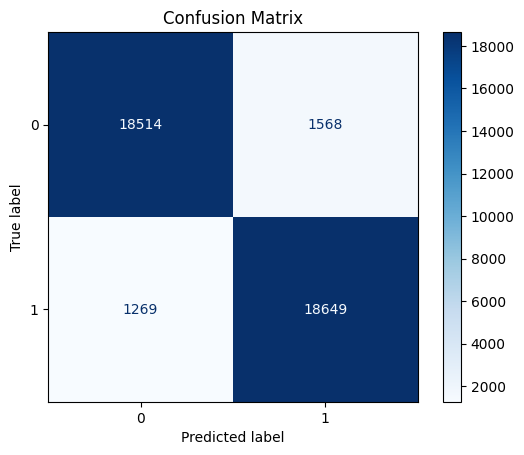

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, digits=4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Measuring Test Accuracy

In [127]:
X_test_list = list(X_test)

#### Preparing X_test tensor

In [128]:
# mod = torch.compile(mod)  # Optional; ensure compatibility

list_embed_test = torch.empty((len(X_test_list), MAX_LENGTH, EMB_DIM), dtype=torch.float16)  # Pre-allocate tensor

batch_size = 16
for i in tqdm.tqdm(range(0, len(X_test_list), batch_size)):
    batch = X_test_list[i:i+batch_size]
    with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
        inputs = tokenizer(batch, padding="max_length", truncation=True,
                           max_length= MAX_LENGTH, return_tensors="pt").to(device, non_blocking=True)
        out = mod(**inputs)
        emb = out.last_hidden_state.cpu()  # Shape: (batch_size, 100, 128)
        list_embed_test[i:i+batch_size] = emb

torch.cuda.empty_cache()


  0%|          | 0/625 [00:00<?, ?it/s]/tmp/ipython-input-128-2279299137.py:8: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
100%|██████████| 625/625 [00:12<00:00, 51.26it/s]


In [129]:
X_test_tensor = list_embed_test

In [130]:
y_test_tensor = torch.from_numpy(y_test.values)

In [131]:
test_ds = CustomDataset(X_test_tensor, y_test_tensor)

In [132]:
test_dl = DataLoader(test_ds, batch_size = 16, shuffle = False)

In [133]:
model.eval()

lstm(
  (lstm_layer): LSTM(128, 32, batch_first=True, dropout=0.3)
  (lin1): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [134]:
total_corr = 0
preds = []
actual = []

#### Test Loop

In [135]:
with torch.no_grad():
   for inp, outp in tqdm.tqdm(test_dl):
    inp = inp.to(device)
    actual.append(outp)
    outp = outp.to(device)
    pred = model(inp.to(torch.float32))
    preds.append(pred.to('cpu'))
    pred = pred > 0.5
    corr = torch.sum(pred.reshape(-1).to(torch.float32) == outp.to(torch.float32))
    total_corr += corr

100%|██████████| 625/625 [00:00<00:00, 679.20it/s]


In [136]:
preds = torch.stack(preds)
actual = torch.stack(actual)
actual = actual.reshape(-1)
preds = preds.reshape(-1)

In [222]:
y_pred = preds > 0.5
y_prob = preds
y_true = actual.numpy()

              precision    recall  f1-score   support

           0     0.8210    0.8131    0.8170      4918
           1     0.8208    0.8284    0.8246      5082

    accuracy                         0.8209     10000
   macro avg     0.8209    0.8208    0.8208     10000
weighted avg     0.8209    0.8209    0.8209     10000



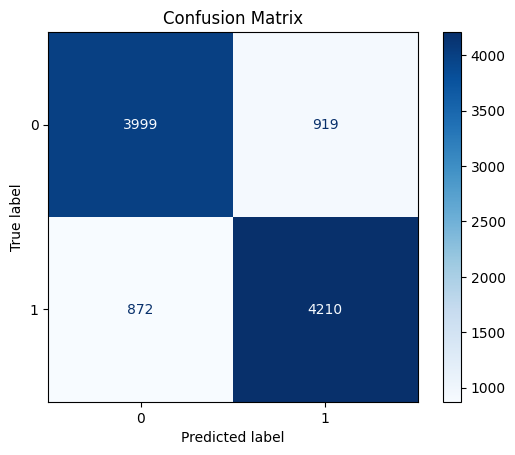

In [138]:
cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, digits=4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    PrecisionRecallDisplay
)

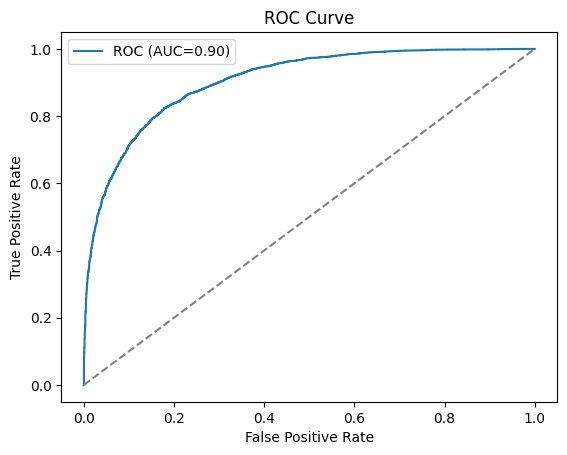

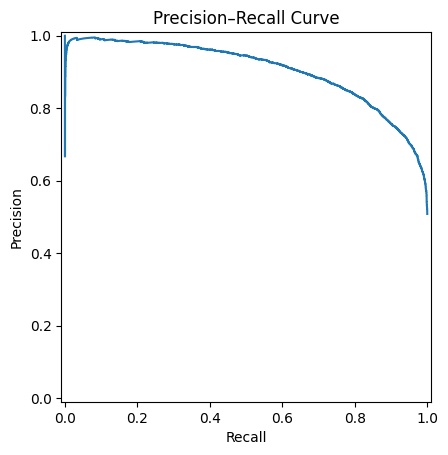

ROC AUC: 0.90


In [223]:
roc_auc = roc_auc_score(y_true, y_prob)
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_display = PrecisionRecallDisplay(precision=prec, recall=rec)
pr_display.plot()
plt.title("Precision–Recall Curve")
plt.show()

print(f"ROC AUC: {roc_auc:.2f}")


In [139]:
total_corr/10000 ## Accuracy

tensor(0.8209, device='cuda:0')

In [200]:
def test_sent(sent_string):
  sent = sent_string
  with torch.no_grad(), torch.amp.autocast('cuda:0', dtype=torch.float16):
        inputs = tokenizer(sent, padding="max_length", truncation=True,
                            max_length=100, return_tensors="pt").to(device, non_blocking=True)
        out = mod(**inputs)
        emb = out.last_hidden_state.cpu()
        inp = emb.to(device)
        pred = model(inp.to(torch.float32))
        pred_val = pred > 0.5
        pred = pred.to('cpu')
        if pred_val:
          print('Positive')
          print(f"Positivity Score: {pred.item() * 100:.2f}/100")
        else:
          print('Negative')
          print(f"Negativity Score: {(1 - pred.item()) * 100:.2f}/100")

In [201]:
test_sent("The movie was boring and lacked quality")

Negative
Negativity Score: 88.20/100


In [202]:
MI_review = """Mission: Impossible –The final Reckoning: A Masterclass in Action Storytelling
Mission: Impossible The final Reckoning 2025 delivers everything you'd hope for—and more.
The soundtrack is powerful and perfectly synced with the film’s pacing, driving the energy of every sequence. The dialogues and monologues are sharp, purposeful, and filled with emotional and thematic weight."""
test_sent(MI_review)

Positive
Positivity Score: 99.90/100


In [203]:
Confusing_Rev = "There was no story in the movie. It was aimless"
test_sent(Confusing_Rev)

Negative
Negativity Score: 99.99/100


In [204]:
test_sent("The movie lacked quality")

Positive
Positivity Score: 90.38/100


In [205]:
test_sent("The movie was low quality")

Positive
Positivity Score: 54.83/100


In [206]:
test_sent("The quality of the movie was low")

Positive
Positivity Score: 65.28/100


In [207]:
test_sent("Watch at your own risk. Money wasted")

Negative
Negativity Score: 82.43/100


In [208]:
test_sent("Watch at your own risk")

Negative
Negativity Score: 80.00/100


In [209]:
print(X_test.iloc[500])
test_sent(X_test.iloc[500])

I remember this movie from the 50s when I was in college. It is one of the funniest satires of American Westerns that I have ever seen. I'm only sorry that I have not been able to see it recently and that it is is not out on tape or DVD. It is a real treat.
Positive
Positivity Score: 99.32/100


In [217]:
print(X_train[0])
print(f'Label: {y_train[0]}')
test_sent(X_train[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [216]:
print(X_test.iloc[1])
print(f'Label: {y_test.iloc[1]}')
test_sent(X_test.iloc[1])

Not well done at all, the whole movie was just the Grudge going around and killing random people out of nowhere. Random people that have nothing to do with the story get killed, like the 3 school girls for example.<br /><br />The family at the beginning has nothing to do with the story either, I believe them to be a random family that never went in the house, and never had anything to do with the killings of the Grudge.<br /><br />Did not impress me at all, I was not scared, I didn't jump at any parts, and the whole movie was just a random piece of crap to get more money off of. Makes the Gridge 1 look like crap also, which was actually an alright movie.<br /><br />I believe that The Grudge 2 is like a leading movie to The Grudge 3, if they ever make one. They shouldn't have even called this the Grudge 2, they should of called it the prologue to the Grudge 2, and you will see if you watched it, because I am not going to spoil anything. Not that it would have mattered anyway.<br /><br /

In [215]:
print(X_test.iloc[1255])
print(f'Label: {y_test.iloc[1255]}')
test_sent(X_test.iloc[1255])

That song keeps humming in my head. Not the greatest song, but it's the 80's. This movie is about a lead singer who "supposebly" gets killed while being accused of murders as he stalks his girlfriend who sings backup vocals in his band. The lead singer whos name is Billy "Eye" (yeah, right) is dead after two years and his band comes back for a concert only the backup vocalist is the lead singer this time. Billy stalks her and eventually goes around killing all these people and terrifying the girl and makeing people around her think theres something wrong with her and that shes imagining things. She finally decides to go to a cemetary and dig up his grave to see if he's still there. She sees that he's dead but still see's and hears his voice. During the end of the movie we find out the reason behind all of this, Billy has a brother named John (right again) and John admits that he was jealous of his brother and that he killed all those people to get back at him and place the blame on his

In [218]:
print(X_test.iloc[1905])
print(f'Label: {y_test.iloc[1905]}')
test_sent(X_test.iloc[1905])

Chris Rock stars in this remake of Warren Beatty's Heaven Can Wait (itself a remake of the 1941 film Here Comes Mr. Jordan), a comedy about a man who dies before his time, before he can realize his dreams, and his adventures in his new (albeit temporary) body. In the Beatty version, the protagonist was a backup quarterback for the then-Los Angeles Rams. In Rock's hipper version, our lead character is a struggling young - and decidedly low-talent - standup comedian.<br /><br />It's very funny to see the razor-sharp Rock playing a bad comedian. It's kind of like seeing Tom Hanks play a bad actor. Lance Barton's dream is to play the legendary Apollo Theater on a non-amateur night. But every time he tries out his material, he's booed off the stage lustily - so much so that his nickname becomes "Booie." His jokes are lame, his delivery painful. In short, Lance is everything that the real Chris Rock isn't.<br /><br />Lance is also a bike messenger, and he's riding the streets on his way to t

In [219]:
print(X_test.iloc[6500])
print(f'Label: {y_test.iloc[6500]}')
test_sent(X_test.iloc[6500])

Frank Sinatra took this role, chewed it up with the rest of the scenery and - spat it out HIS way. TMWTGA is stagey, the ending is trite, some of the scenes need a little more cutting, but that's all. It's great entertainment from start to finish, and while you watch it you realise that Sinatra, that long-dead MOR crooner, had junkies, gangster card games and the whole US urban hustle thing in his blood - he didn't learn it from an acting coach. There are all sorts of directorial touches to keep you amused, and the (non-dated) soundtrack cooks all the way. The marathon card game beat Goodfellas, Sopranos, etc. by forty years! So it wasn't faithful to the book? What movie is? And I can't imagine it being remembered if Brando had been let loose on it; the cold turkey scenes would have been embarrassing, instead of edgy, convincing and moving with Sinatra. No-one else has mentioned the seedy, lazy, cynical cops - absolutely spot on! And Eleanor Parker would have driven *me* to smack.
Labe

In [224]:
print(X_test.iloc[5000])
print(f'Label: {y_test.iloc[5000]}')
test_sent(X_test.iloc[5000])

I can't really remember any details of this movie except that the setting looked awfully familiar. Then I realized it was filmed at the Lazy Lizard Hostel in Moab, Utah. That was one of my favorite places to visit when I was younger and wandered around the country. The guy who owns/manages the hostel managed to get himself in the movie. All I remember about the plot of the movie is that it involves jeeps and naked women. It is great to watch just for the scenery (I mean the rock formations)... If you are just looking for soft-core porn, you will probably be better served elsewhere. I don't even know if this movie is available on tape or DVD.
Label: 0
Positive
Positivity Score: 99.27/100


In [225]:
print(X_test.iloc[8500])
print(f'Label: {y_test.iloc[8500]}')
test_sent(X_test.iloc[8500])

This has to be the worst piece of garbage I've seen in a while.<br /><br />Heath Ledger is a heartthrob? He looked deformed. I wish I'd known that he and Naomi Watts are an item in real life because I spent 2 of the longest hours of my life wondering what she saw in him. <br /><br />Orlando Bloom is a heartthrob? With the scraggly beard and deer-in-the-headlights look about him, I can't say I agree.<br /><br />Rachel Griffiths was her usual fabulous self, but Geoffrey Rush looked as if he couldn't wait to get off the set. <br /><br />I'm supposed to feel sorry for bankrobbers and murderers? This is a far cry from Butch Cassidy, which actually WAS an entertaining film. This was trite, cliche-ridden and boring. We only stayed because we were convinced it would get better. It didn't.<br /><br />The last 10-15 minutes or so were unintentionally hilarious. Heath and his gang are holed up in a frontier hotel, and women and children are dying because of their presence. That's not funny. But i